This textbook is for open development. Don't worry about deleting, changing, or adding anything. 

In [ ]:
import PIL
from PIL import Image

In [ ]:
import elevation
import os

In [ ]:
import rasterio

In [ ]:
os.system("!eio clip -o Shasta-30m-DEM.tif --bounds -122.6 41.15 -121.9 41.6")

In [ ]:
output = "C:\\Users\\nicoc\\Downloads\\LF2016_Elev_200_CONUS\\Tif\\LC16_Elev_200.tif"
elevation.clip(bounds=(12.35, 41.8, 12.65, 42), output=output, product='SRTM3')

In [ ]:
im = Image.open(r"C:\Users\nicoc\Pictures\BEAM_meme.png")
im.show()

In [ ]:
import rasterio

coords = ((23.363,-36.419), (147.361,-36.430))
elevation = 'C:\\Users\\nicoc\\Downloads\\LF2016_Elev_200_CONUS\\Tif\\LC16_Elev_200.tif'

with rasterio.open(elevation) as src:
    band = src.read()  # read band 1, return a nodata MaskedArray
    print(band)
    print(band.min(), band.max())
    vals = src.sample(coords)
    print(vals)
    for val in vals:
        print(val[0]) #val is an array of values, 1 element 
                      #per band. src is a single band raster 
                      #so we only need val[0

In [ ]:
from osgeo import gdal, osr
import numpy as np
import rasterio as rs
import os
print(os.path.exists(r'C:\\Users\\nicoc\\Downloads\\LF2019_FBFM13_200_CONUS\\Tif\\LC19_F13_200.tif'))
ds = gdal.Open(r'C:\\Users\\nicoc\\Downloads\\LF2019_FBFM13_200_CONUS\\Tif\\LC19_F13_200.tif')
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
gp = ds.GetProjection()
print(width, height, gt, gp)
#data = np.array(ds.ReadAsArray(3000, 5555, 10000, 10000))
band = ds.GetRasterBand(1)
print(FJLDS)
point_srs = osr.SpatialReference() # checK
#point_srs.ImportFromEPSG(4326) # hardcode for lon/lat
points_srs = point_srs.ImportFromWkt(ds.GetProjectionRef())



# GDAL>=3: make sure it's x/y
# see https://trac.osgeo.org/gdal/wiki/rfc73_proj6_wkt2_srsbarn
point_srs.SetAxisMappingStrategy(osr.OAMS_TRADITIONAL_GIS_ORDER)     

file_srs = osr.SpatialReference()
file_srs.ImportFromWkt(gp)

ct = osr.CoordinateTransformation(point_srs, file_srs)

point_x = -114.06138 # lon
point_y = 51.03163  # lat
mapx, mapy, z = ct.TransformPoint(point_x, point_y)

gt_inv = gdal.InvGeoTransform(gt)
pixel_x, pixel_y = gdal.ApplyGeoTransform(gt_inv, mapx, mapy)

# round to pixel
pixel_x = round(pixel_x)
pixel_y = round(pixel_y)

# clip to file extent
pixel_x = max(min(pixel_x, width-1), 0)
pixel_y = max(min(pixel_y, height-1), 0)

print(pixel_x, pixel_y)

print(data)
pixel_data = data[pixel_y, pixel_x]

In [ ]:
from osgeo import osr, ogr, gdal


def world_to_pixel(geo_matrix, x, y):
    """
    Uses a gdal geomatrix (gdal.GetGeoTransform()) to calculate
    the pixel location of a geospatial coordinate
    """
    ul_x= geo_matrix[0]
    ul_y = geo_matrix[3]
    x_dist = geo_matrix[1]
    y_dist = geo_matrix[5]
    pixel = int((x - ul_x) / x_dist)
    line = -int((ul_y - y) / y_dist)
    return pixel, line

# Extract target reference from the tiff file
ds = gdal.Open(r'C:\\Users\\nicoc\\Downloads\\LF2016_Elev_200_CONUS\\Tif\\LC16_Elev_200.tif')
target = osr.SpatialReference(wkt=ds.GetProjection())

source = osr.SpatialReference()
source.ImportFromEPSG(4326)

transform = osr.CoordinateTransformation(source, target)
#41.3099° N, 122.3106° W
# 41.409767, -122.201180
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(41.40998, -122.201)
point.Transform(transform)

x, y = world_to_pixel(ds.GetGeoTransform(), point.GetX(), point.GetY())
print(x, y)
data = np.array(ds.ReadAsArray(x, y, 1, 1))
data

In [ ]:
gp

In [ ]:
get_elevation(-122.3,41.3)

In [ ]:
elevation_function((40.94, -120.0))

In [ ]:
import requests
import pandas as pd
import urllib3
import urllib

# script for returning elevation from lat, long, based on open elevation data
# which in turn is based on SRTM
def make_remote_request(url: str, params: dict):
    """
    Makes the remote request
    Continues making attempts until it succeeds
    """
    count = 1
    while True:
        try:
            response = requests.get((url + urllib.parse.urlencode(params)))
        except (OSError, urllib3.exceptions.ProtocolError) as error:
            print('\n')
            print('*' * 20, 'Error Occured', '*' * 20)
            print(f'Number of tries: {count}')
            print(f'URL: {url}')
            print(error)
            print('\n')
            count += 1
            continue
        break

    return response

def elevation_function(x):
    # url = 'https://api.opentopodata.org/v1/eudem25m?'
    url = 'https://api.open-elevation.com/api/v1/lookup?'
    params = {'locations': f"{x[0]},{x[1]}"}
    result = make_remote_request(url, params)
    print(result.json())
    return result.json()['results'][0]['elevation']

def get_elevation(lat, long):
    query = ('https://api.open-elevation.com/api/v1/lookup')
    r = requests.get(query).json()  # json object, various ways you can extract value
    # one approach is to use pandas json functionality:
    elevation = pd.io.json.json_normalize(r, 'results')['elevation'].values[0]
    return elevation

In [ ]:
im = Image.open(r"C:\Users\nicoc\Downloads\LF2016_Elev_200_CONUS\Tif\LC16_Elev_200.tif")

In [ ]:
import os 

In [ ]:
os.path.isfile("C:\\Users\\nicoc\\Downloads\\LF2016_Elev_200_CONUS\\Tif\\LC16_Elev_200.tif")

In [ ]:

# script for returning elevation from lat, long, based on open elevation data
# which in turn is based on SRTM
def make_remote_request(url: str, params: dict):
    """
    Makes the remote request
    Continues making attempts until it succeeds
    """
    count = 1
    while True:
        try:
            response = requests.get((url + urllib.parse.urlencode(params)))
        except (OSError, urllib3.exceptions.ProtocolError) as error:
            print('\n')
            print('*' * 20, 'Error Occured', '*' * 20)
            print(f'Number of tries: {count}')
            print(f'URL: {url}')
            print(error)
            print('\n')
            count += 1
            continue
        break

    return response
def elevation_function(x):
    # url = 'https://api.opentopodata.org/v1/eudem25m?'
    url = 'https://api.open-elevation.com/api/v1/lookup?'
    params = {'locations': f"{x[0]},{x[1]}"}
    result = make_remote_request(url, params)
    #print(result.json())
    return result.json()['results'][0]['elevation']

def get_elevation(lat, long):
    query = ('https://api.open-elevation.com/api/v1/lookup')
    r = requests.get(query).json()  # json object, various ways you can extract value
    # one approach is to use pandas json functionality:
    elevation = pd.io.json.json_normalize(r, 'results')['elevation'].values[0]
    return elevation

def elevation_func(elevation, xRange, yRange, xDiff, yDiff):
    x = np.arange(xRange[0], xRange[1] + xDiff, xDiff)
    y = np.arange(yRange[0], yRange[1] + yDiff, yDiff)
    meshgrid = np.array(np.meshgrid(x, y))
    elevation_matrix = np.zeros(meshgrid[0].shape)
    
    coords = [(meshgrid[0][i][j], meshgrid[1][i][j]) for i in range(len(meshgrid[0])) for j in range(len(meshgrid[0][0]))]
    vals_array = []
    print(coords)
    with rasterio.open(elevation) as src:     
        vals = src.sample(coords)
        for val in vals:
            vals_array.append(val)
    return vals_array        


In [3]:
import pickle
path = "C:\\Users\\nico\\Desktop\\Stanford\\OneDrive - Stanford\\Courses\\CS229\\finalproject\\data\\United_States_Fires\\United_States_2018_Fires\\dec\\storage"
with open("{path}\\{id}.pkl".format(path = path, id =21121714), 'rb') as f:
    data = pickle.load(f)
    

In [2]:
from matplotlib import pyplot as plt
import numpy as np

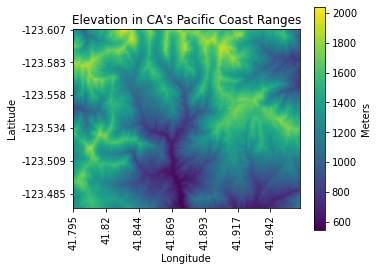

In [41]:
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
fig = plt.matshow(data["Elevation Data"])
ax = plt.gca()
diff = 50
plt.colorbar(label = 'Meters')
plt.xticks(np.arange(0, len(data["Elevation Data"][0]),diff), np.round(np.arange(data['yRange'][0], data['yRange'][1], data['yDiff']*diff), 3), rotation = 90)
plt.yticks(np.arange(0, len(data["Elevation Data"]),diff), np.round(np.arange(data['xRange'][0], data['xRange'][1], data['xDiff']*diff), 3))
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Elevation in CA's Pacific Coast Ranges")
plt.savefig("./../images/elevation.png", bbox_inches='tight')

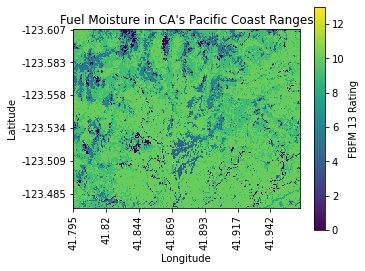

In [44]:
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
topographic_data = data["Topographic Data"]
topographic_data[topographic_data > 13] = 0
fig = plt.matshow(topographic_data)
ax = plt.gca()
diff = 50
plt.colorbar(label = 'FBFM 13 Rating')
plt.clim(0,13)
plt.xticks(np.arange(0, len(data["Topographic Data"][0]),diff), np.round(np.arange(data['yRange'][0], data['yRange'][1], data['yDiff']*diff), 3), rotation = 90)
plt.yticks(np.arange(0, len(data["Topographic Data"]),diff), np.round(np.arange(data['xRange'][0], data['xRange'][1], data['xDiff']*diff), 3))
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Fuel Moisture in CA's Pacific Coast Ranges")
plt.savefig("./../images/fuel_moisture.png", bbox_inches='tight')

In [4]:
import single_fire
from single_fire import plot_multi_day_fire_from_npy

SQLalchemy is not installed. No support for SQL output.


In [ ]:
len(data['Unique Dates']), len(data['multiDay'])

C:\Users\nico\AppData\Local\Temp/ipykernel_656/441326282.py:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(x=300, y=120, dx=-200, dy=60, width=4, color = 'cyan', facecolor = 'cyan', label = 'General Trend')


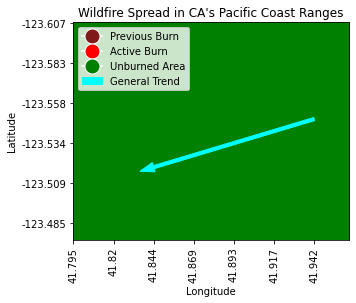

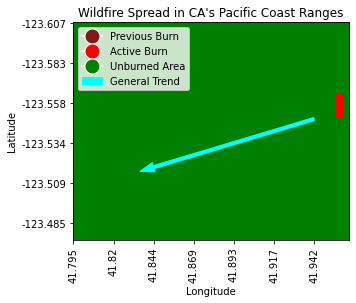

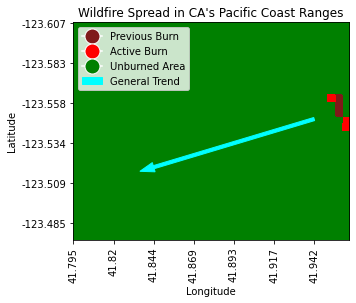

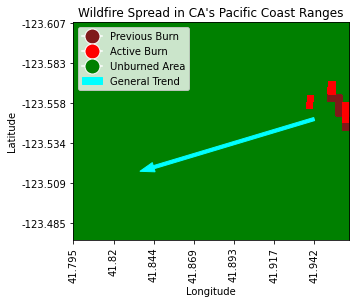

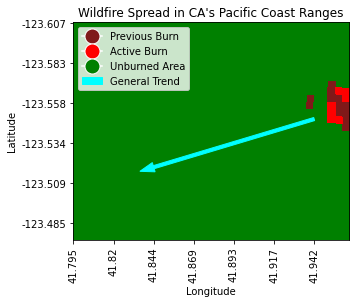

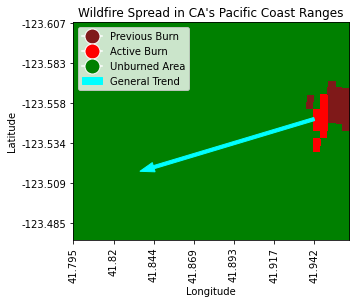

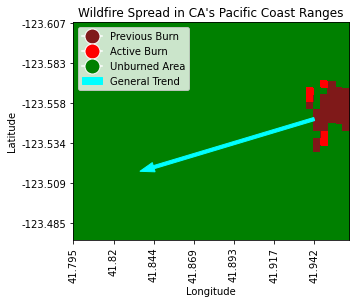

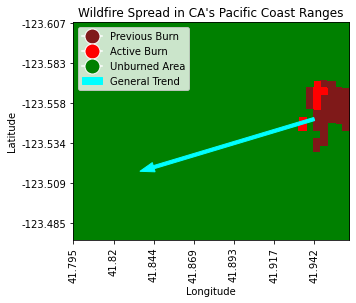

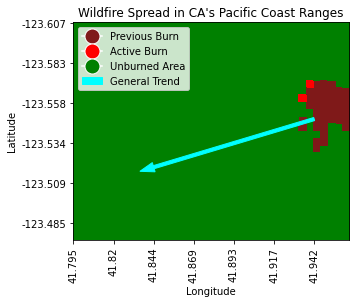

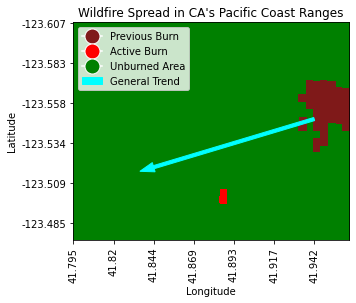

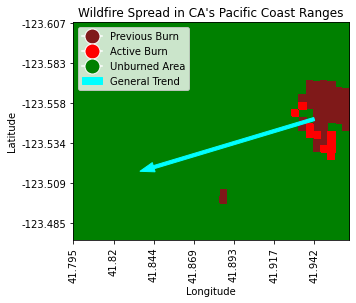

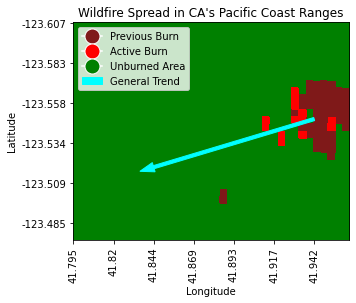

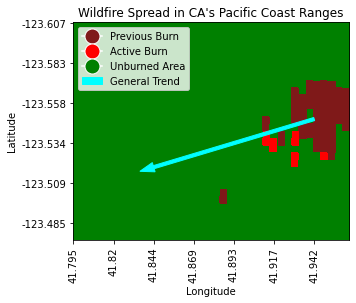

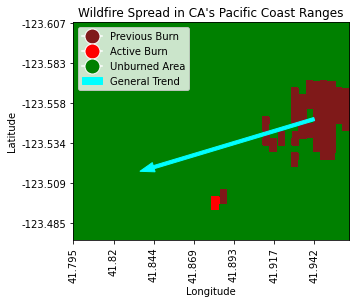

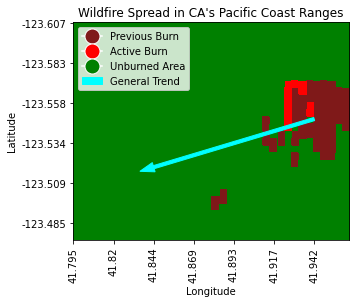

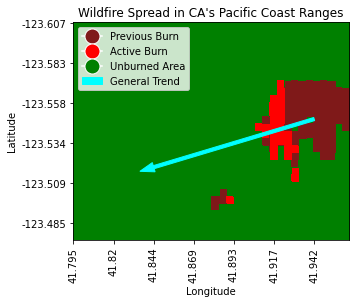

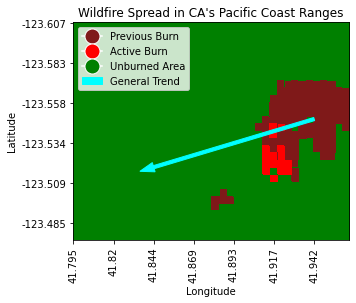

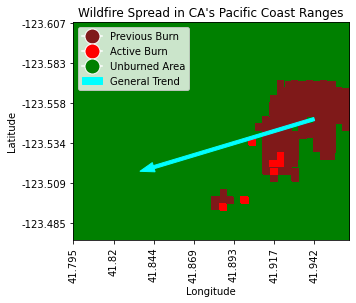

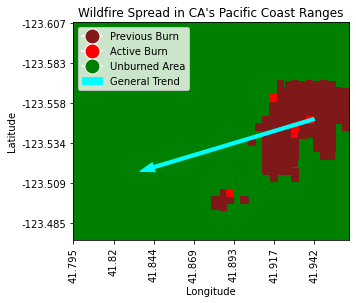

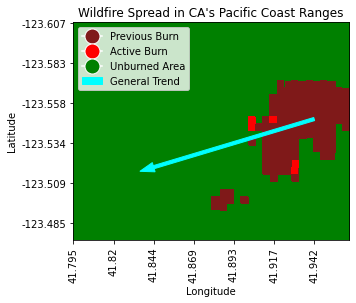

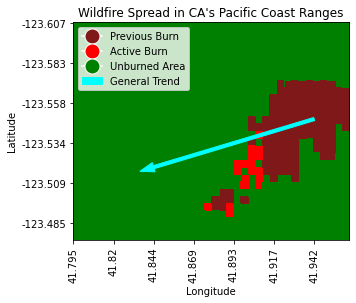

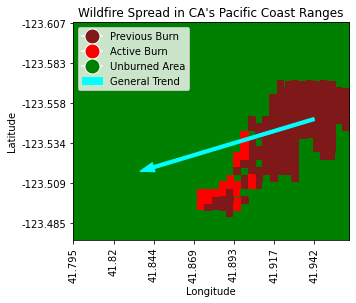

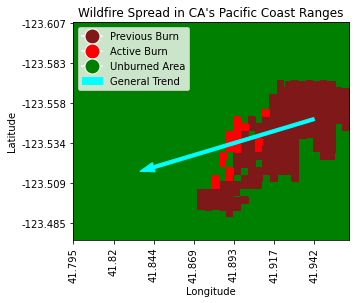

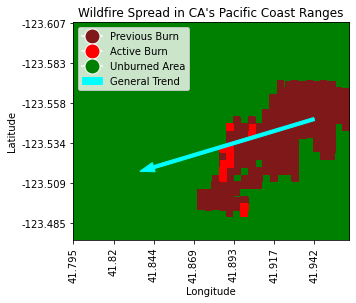

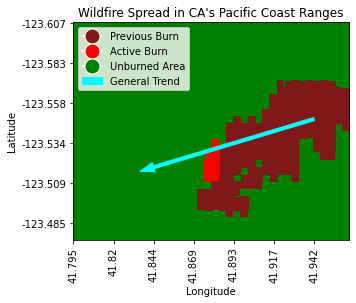

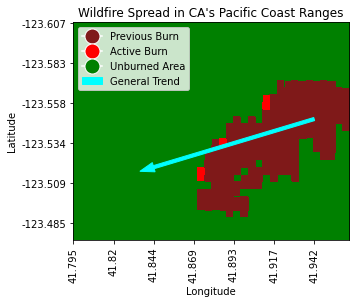

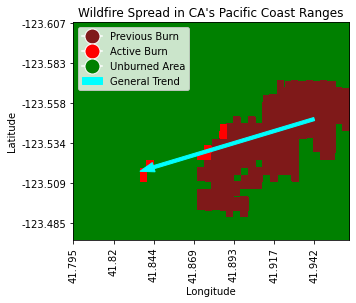

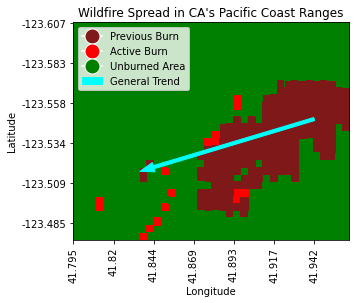

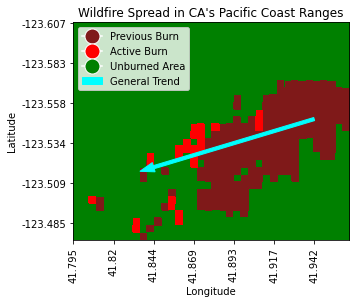

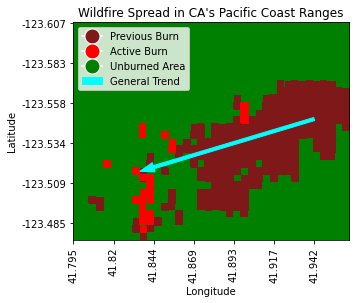

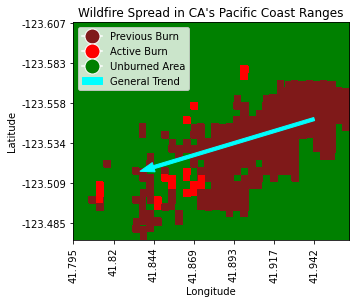

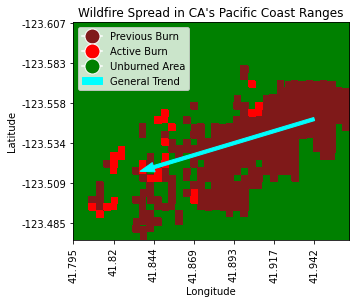

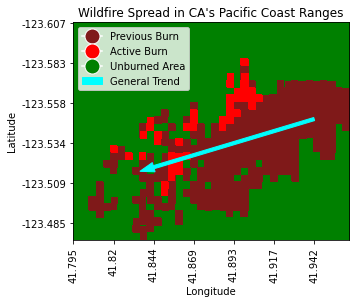

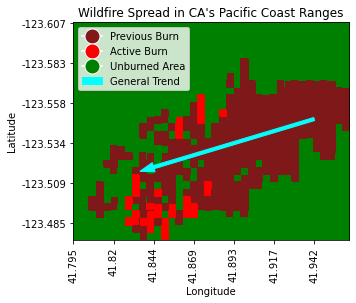

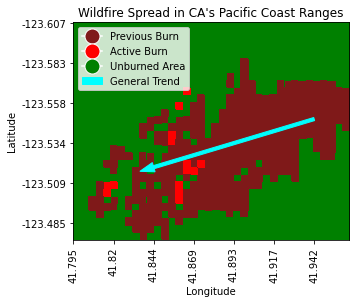

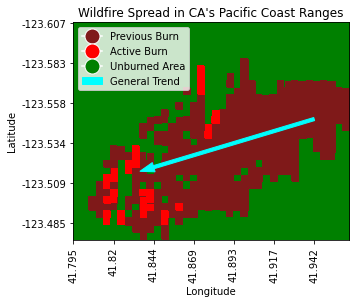

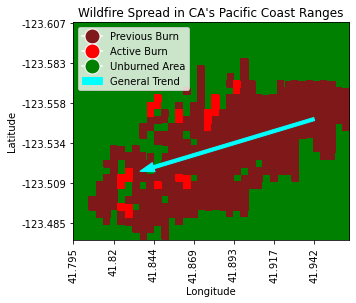

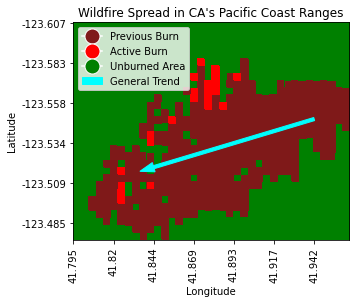

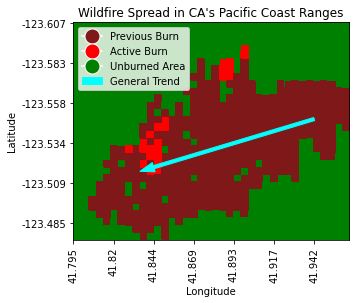

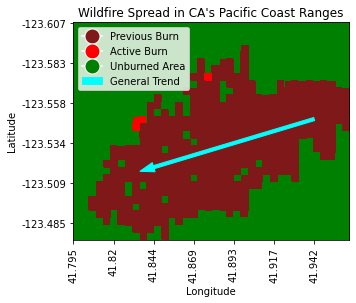

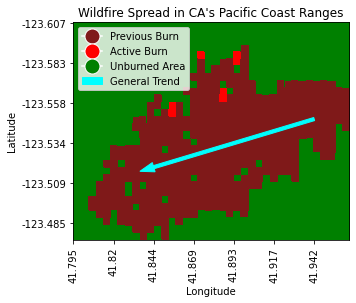

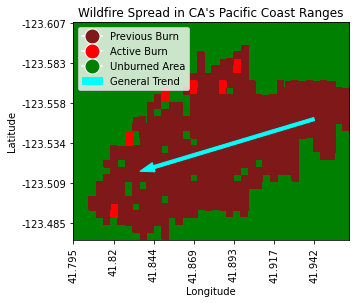

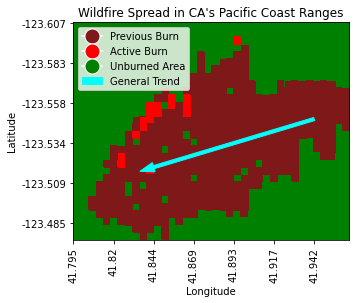

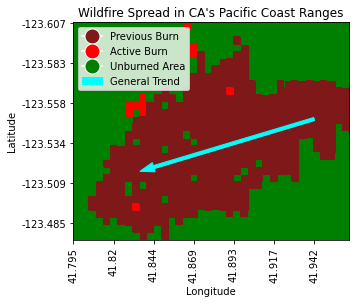

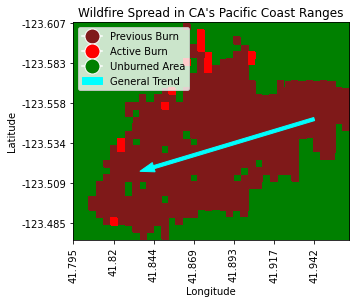

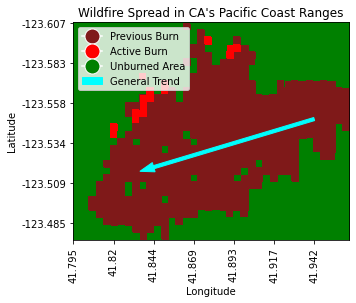

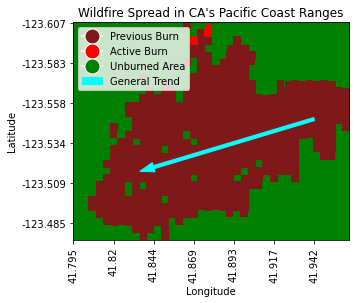

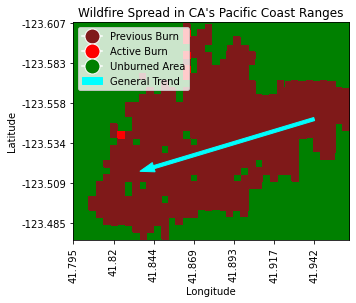

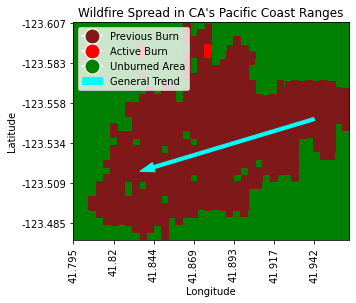

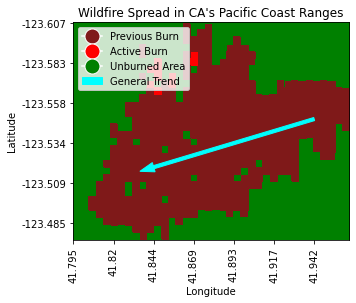

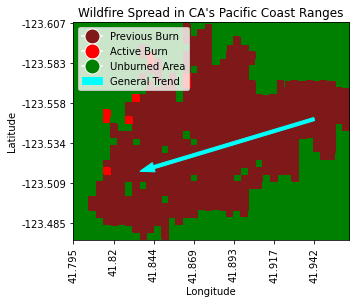

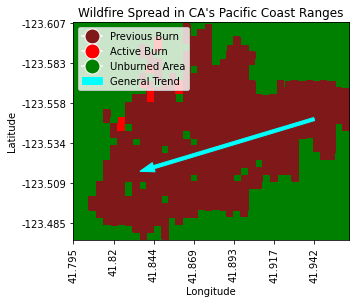

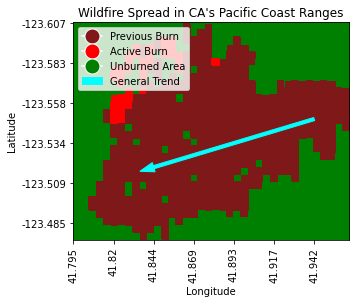

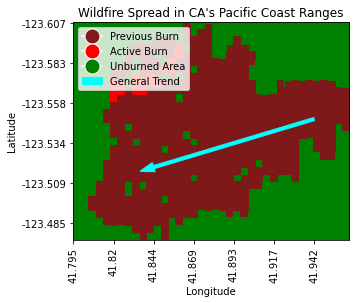

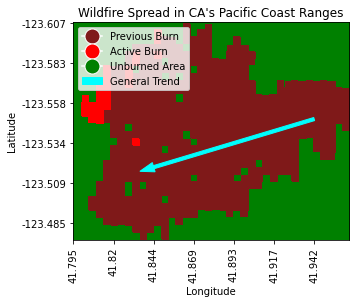

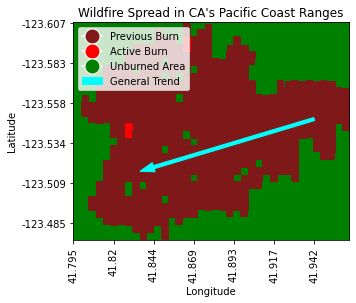

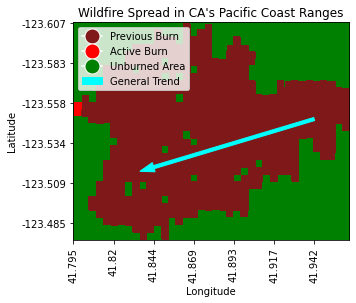

In [39]:
 plot_multi_day_fire_from_npy('dec', '2017', '21370321', month_shape = data['multiDay']) 

In [ ]:
plt.matshow(data['Topographic Data'])

In [38]:
from matplotlib.lines import Line2D
from matplotlib import patches
import shapefile
import numpy as np
import matplotlib
import pandas as pd
import simpledbf 
from simpledbf import Dbf5
import util
from util import plotPolygons
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.patches import Polygon
import matplotlib as mpl
import itertools
from matplotlib import pyplot

def plot_multi_day_fire_from_npy(month_, year_, ID_, custom_path = "./../data/United_States_Fires/United_States_{year}_Fires/{month}/multi_day/{ID}.npy", month_shape = None):
    '''
    For a specific fire ID from a given month and year, plot from the .npy representation
    
    Inputs:
    month --> String of type 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec
    year --> string of type '2019', '2018', etc.
    ID_ --> string with fire ID (e.g. '20034923')
    custom_path --> string with your custom path to the .npy file
    
    Outputs:
    Plots for the multiple day representation of a fire
    
    '''
    # Read in our shapefile for month and year
    if month_shape is None:
        month_shape = np.load(custom_path.format(month = month_, year = year_, ID = ID_))

    # make a color map of fixed colors
    cmap = mpl.colors.ListedColormap(['green', [.5, .1, .1], 'red'])
    bounds=[-.1, 0.2, .8, 1.1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    # tell imshow about color map so that only set colors are used
    prev_shapes = np.zeros(month_shape[0].shape)
    for i in range(0, len(month_shape)):
        day_plot = np.zeros(month_shape[i].shape)
        for j in range(len(day_plot)):
            for k in range(len(day_plot[j])):
                if month_shape[i][j][k] == 1:
                    day_plot[j][k] = 1
                elif prev_shapes[j][k] > 0:
                    day_plot[j][k] = prev_shapes[j][k]
                    
            

        fig, ax = plt.subplots()
        img = pyplot.imshow(day_plot,interpolation='nearest',
                        cmap = cmap,norm=norm)
            # make a color bar
        #pyplot.colorbar(img,cmap=cmap,norm=norm,boundaries=bounds,ticks=[0,1])
        plt.xticks(np.arange(0, len(data["Elevation Data"][0]),diff), np.round(np.arange(data['yRange'][0], data['yRange'][1], data['yDiff']*diff), 3), rotation = 90)
        plt.yticks(np.arange(0, len(data["Elevation Data"]),diff), np.round(np.arange(data['xRange'][0], data['xRange'][1], data['xDiff']*diff), 3))
        ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title("Wildfire Spread in CA's Pacific Coast Ranges")
        plt.arrow(x=300, y=120, dx=-200, dy=60, width=4, color = 'cyan', facecolor = 'cyan', label = 'General Trend') 
        legend_elements = [Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor=[.5, .1, .1], markersize = 15,
                              label='Previous Burn'),
                   Line2D([0], [0], marker='o', color='w', label='Active Burn',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Unburned Area',
                          markerfacecolor='g', markersize=15),
                          patches.Arrow(0, 0, 0.01, 0.01, width = 4, color = 'cyan',label='General Trend')]
        
        
        ax.legend(handles=legend_elements, loc='upper left')
        pyplot.savefig("./../images/wildfire-spread-day-{day}.png".format(day = i), bbox_inches='tight')
        pyplot.show()
        prev_shapes = 0.5 * np.bitwise_or(prev_shapes > 0, month_shape[i] > 0)
        
